In [1]:
import pandas as pd

restos_3 = pd.read_csv(r"filepath")

In [2]:
# Get the shape of the df
num_rows = restos_3.shape[0]

# Print the number of rows
print("Number of rows:", num_rows)

# Get the column names and data types
column_info = restos_3.dtypes

# Print the column names and data types
print("Column names and data types:")
for column_name, dtype in column_info.items():
    print(f"{column_name}: {dtype}")

Number of rows: 216457
Column names and data types:
camis: int64
dba: object
boro: object
building: object
street: object
zipcode: float64
phone: object
inspection_date: object
critical_flag: object
record_date: object
latitude: float64
longitude: float64
community_board: float64
council_district: float64
census_tract: float64
bin: float64
bbl: float64
nta: object
cuisine_description: object
action: object
violation_code: object
violation_description: object
score: float64
inspection_type: object
grade: object
grade_date: object


In [3]:
# Convert the 'inspection_date' column to datetime data type
restos_3['inspection_date'] = pd.to_datetime(restos_3['inspection_date'])

# Now, 'inspection_date' column is converted to datetime data type
print(restos_3.info())  # Check the data types of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216457 entries, 0 to 216456
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   camis                  216457 non-null  int64         
 1   dba                    216457 non-null  object        
 2   boro                   216457 non-null  object        
 3   building               216172 non-null  object        
 4   street                 216457 non-null  object        
 5   zipcode                216457 non-null  float64       
 6   phone                  216457 non-null  object        
 7   inspection_date        216457 non-null  datetime64[ns]
 8   critical_flag          216457 non-null  object        
 9   record_date            216457 non-null  object        
 10  latitude               216457 non-null  float64       
 11  longitude              216457 non-null  float64       
 12  community_board        216077 non-null  floa

In [4]:
# Count occurrences of each value in the "camis" column
camis_counts = restos_3['camis'].value_counts()

# Sort the counts in descending order
sorted_camis_counts = camis_counts.sort_values(ascending=False)

# Print the most recurring values in the "camis" column
print("Most recurring values in the 'camis' column:")
print(sorted_camis_counts)

Most recurring values in the 'camis' column:
40398688    65
40365904    59
41406895    59
50089474    59
50106610    53
            ..
50135476     1
50135497     1
50110882     1
41410066     1
50060759     1
Name: camis, Length: 25994, dtype: int64


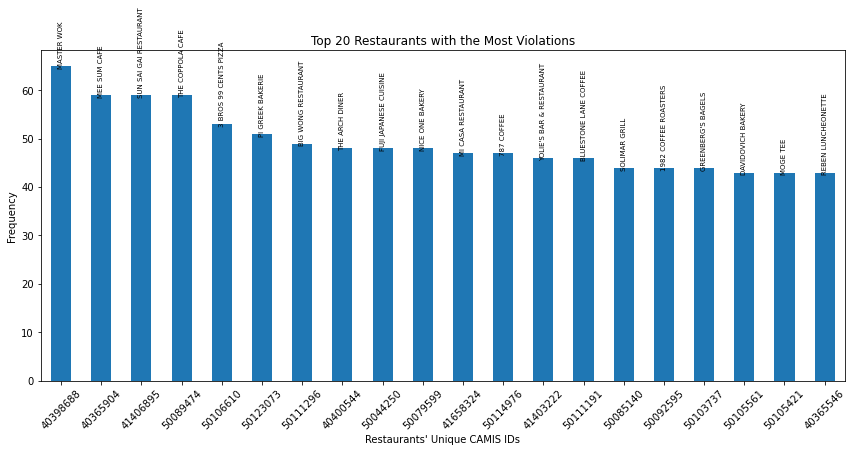

In [7]:
import matplotlib.pyplot as plt

# Count occurrences of each value in the "camis" column
camis_counts = restos_3['camis'].value_counts()

# Sort the counts in descending order and select the top 20
top_20_camis_counts = camis_counts.sort_values(ascending=False).head(20)

# Plotting
plt.figure(figsize=(12, 6))
bars = top_20_camis_counts.plot(kind='bar')
plt.xlabel("Restaurants' Unique CAMIS IDs")
plt.ylabel('Frequency')
plt.title('Top 20 Restaurants with the Most Violations')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding annotations
for i, value in enumerate(top_20_camis_counts):
    plt.text(i, value - 0.3, restos_3[restos_3['camis'] == top_20_camis_counts.index[i]]['dba'].iloc[0], ha='center', rotation=90, fontsize=7)

plt.show()

In [8]:
# Iterate over unique values in the "camis" column
for camis_value in sorted_camis_counts.index:
    # Find the corresponding "dba" value for the current "camis" value
    dba_value = restos_3.loc[restos_3['camis'] == camis_value, 'dba'].iloc[0]
    
    # Find the counts for the current "camis" value
    camis_count = sorted_camis_counts[camis_value]

    # Find the "boro" value for the current "camis" value
    boro_value = restos_3.loc[restos_3['camis'] == camis_value, 'boro'].iloc[0]
    
    # Find the latest inspection date for the current "camis" value
    latest_inspection_date = restos_3.loc[restos_3['camis'] == camis_value, 'inspection_date'].max()
    
    # Find the oldest inspection date for the current "camis" value
    most_recent_inspection_date = restos_3.loc[restos_3['camis'] == camis_value, 'inspection_date'].min()
    
    # Find the count of "NA" values in the "violation_code" column for the current "camis" value
    na_count = restos_3.loc[(restos_3['camis'] == camis_value) & (restos_3['violation_code'] == 'NA'), 'violation_code'].count()
    
    # Print the "camis" value, its count, corresponding "dba" value, latest inspection date, most recent inspection date,
    # count of "NA" values, and the "boro" value
    print(f"Camis: {camis_value}, Count: {camis_count}, DBA: {dba_value}, Boro: {boro_value}, Latest Inspection Date: {latest_inspection_date}, Most Recent Inspection Date: {most_recent_inspection_date}, Count of 'NA' Violation Codes: {na_count}")


Camis: 40398688, Count: 65, DBA: MASTER WOK, Boro: Brooklyn, Latest Inspection Date: 2020-03-11 00:00:00, Most Recent Inspection Date: 2017-04-24 00:00:00, Count of 'NA' Violation Codes: 0
Camis: 40365904, Count: 59, DBA: MEE SUM CAFE, Boro: Manhattan, Latest Inspection Date: 2023-12-13 00:00:00, Most Recent Inspection Date: 2021-10-13 00:00:00, Count of 'NA' Violation Codes: 0
Camis: 41406895, Count: 59, DBA: SUN SAI GAI RESTAURANT, Boro: Manhattan, Latest Inspection Date: 2023-09-27 00:00:00, Most Recent Inspection Date: 2021-11-03 00:00:00, Count of 'NA' Violation Codes: 0
Camis: 50089474, Count: 59, DBA: THE COPPOLA CAFE, Boro: Manhattan, Latest Inspection Date: 2024-03-21 00:00:00, Most Recent Inspection Date: 2022-02-28 00:00:00, Count of 'NA' Violation Codes: 0
Camis: 50106610, Count: 53, DBA: 3 BROS 99 CENTS PIZZA, Boro: Queens, Latest Inspection Date: 2024-03-12 00:00:00, Most Recent Inspection Date: 2021-07-19 00:00:00, Count of 'NA' Violation Codes: 0
Camis: 50123073, Count:

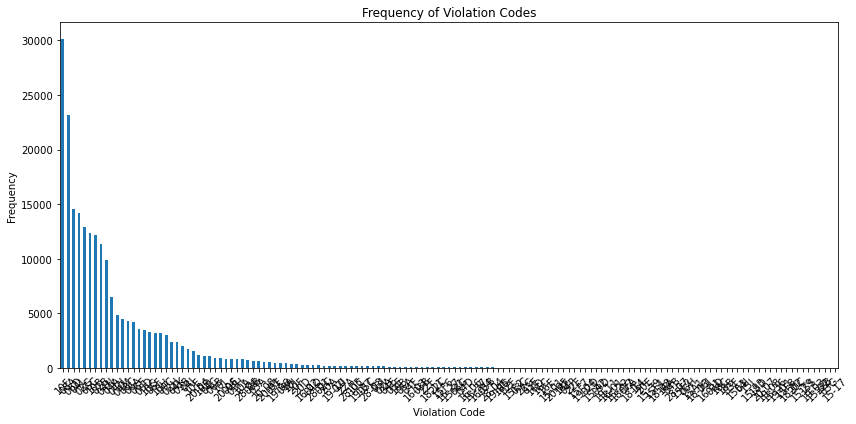

In [9]:
# Count occurrences of each violation_code
violation_counts = restos_3['violation_code'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
violation_counts.plot(kind='bar')
plt.xlabel('Violation Code')
plt.ylabel('Frequency')
plt.title('Frequency of Violation Codes')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

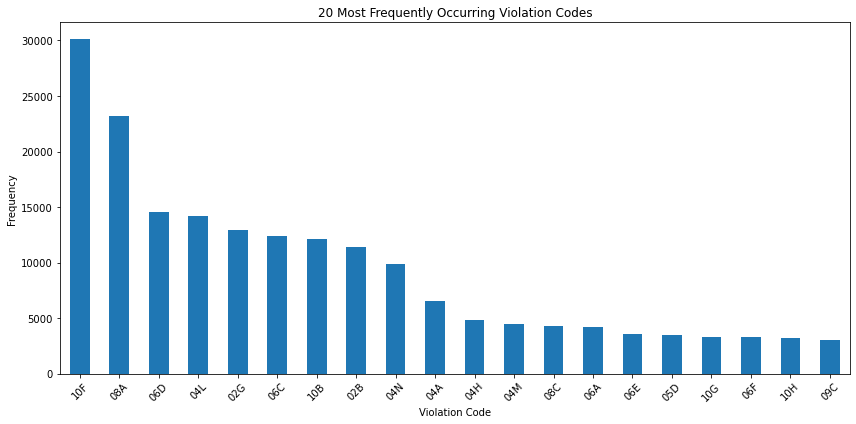

In [11]:
# Count occurrences of each violation_code
violation_counts = restos_3['violation_code'].value_counts()

# Sort the counts in descending order and select the top 20
top_20_violation_counts = violation_counts.head(20)

# Plotting
plt.figure(figsize=(12, 6))
top_20_violation_counts.plot(kind='bar')
plt.xlabel('Violation Code')
plt.ylabel('Frequency')
plt.title('20 Most Frequently Occurring Violation Codes')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

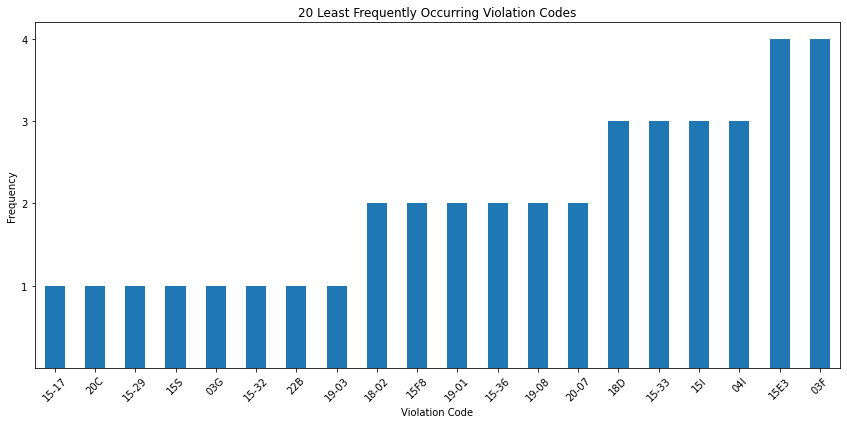

In [12]:
# Sort the counts in ascending order
sorted_violation_counts = violation_counts.sort_values(ascending=True)

# Select the bottom 20 least frequently occurring violation codes
bottom_20_violation_counts = sorted_violation_counts.head(20)

# Plotting
plt.figure(figsize=(12, 6))
bottom_20_violation_counts.plot(kind='bar')
plt.xlabel('Violation Code')
plt.ylabel('Frequency')
plt.title('20 Least Frequently Occurring Violation Codes')
plt.xticks(rotation=45)
plt.tight_layout()

# Set y-axis tick positions to whole integer values
plt.yticks(range(int(bottom_20_violation_counts.min()), int(bottom_20_violation_counts.max()) + 1))

plt.show()

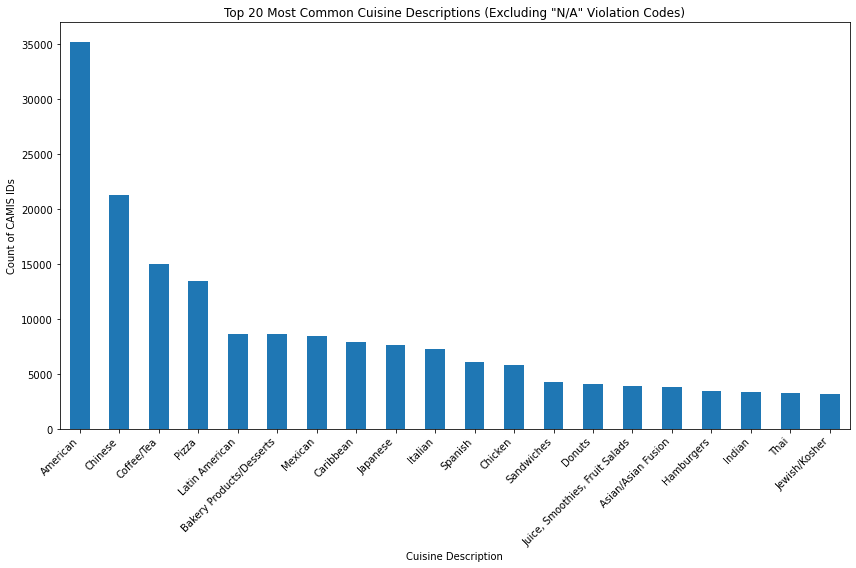

In [13]:
import matplotlib.pyplot as plt

# Count occurrences of each cuisine_description
cuisine_counts = restos_3[restos_3['violation_code'] != 'N/A']['cuisine_description'].value_counts()

# Sort the counts in descending order
sorted_cuisine_counts = cuisine_counts.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sorted_cuisine_counts.head(20).plot(kind='bar')
plt.ylabel('Count of CAMIS IDs')
plt.xlabel('Cuisine Description')
plt.title('Top 20 Most Common Cuisine Descriptions (Excluding "N/A" Violation Codes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

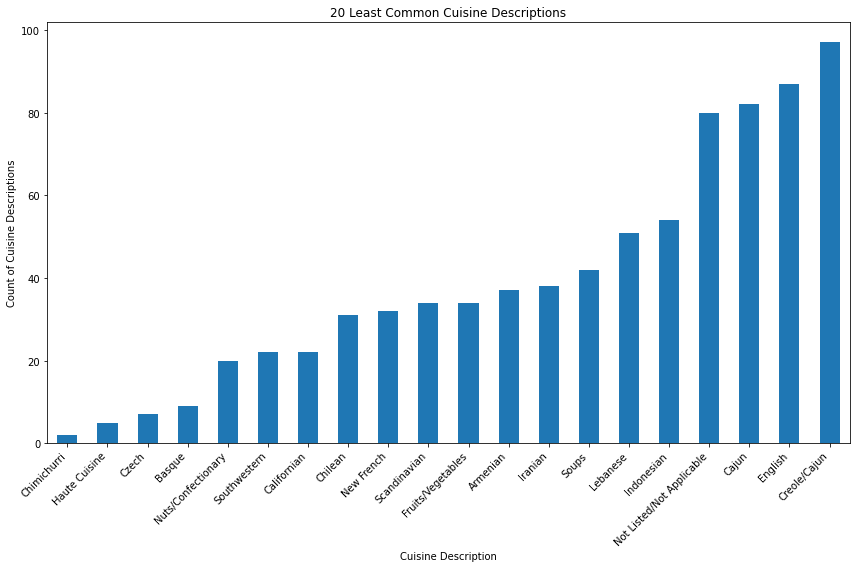

In [18]:
# Count occurrences of each cuisine_description
cuisine_counts = restos_3['cuisine_description'].value_counts()

# Sort the counts in ascending order
sorted_cuisine_counts = cuisine_counts.sort_values(ascending=True)

# Plotting
plt.figure(figsize=(12, 8))
sorted_cuisine_counts.head(20).plot(kind='bar')
plt.ylabel('Count of Cuisine Descriptions')
plt.xlabel('Cuisine Description')
plt.title('20 Least Common Cuisine Descriptions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

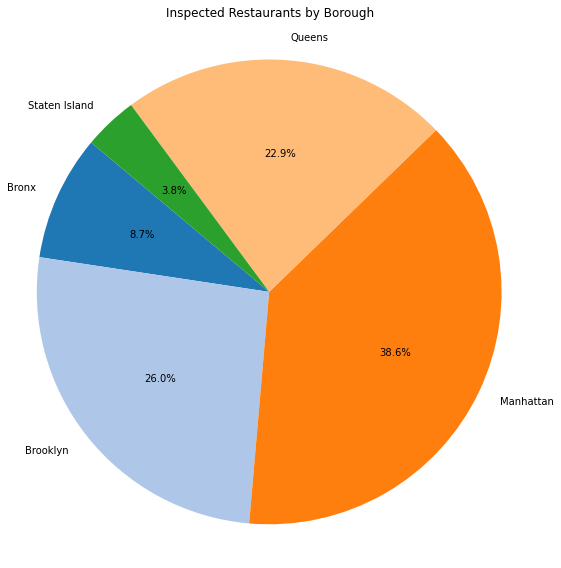

In [14]:
# Group by 'boro' and count unique 'CAMIS'
unique_camis_by_boro = restos_3.groupby('boro')['camis'].nunique()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(unique_camis_by_boro, labels=unique_camis_by_boro.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Inspected Restaurants by Borough')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

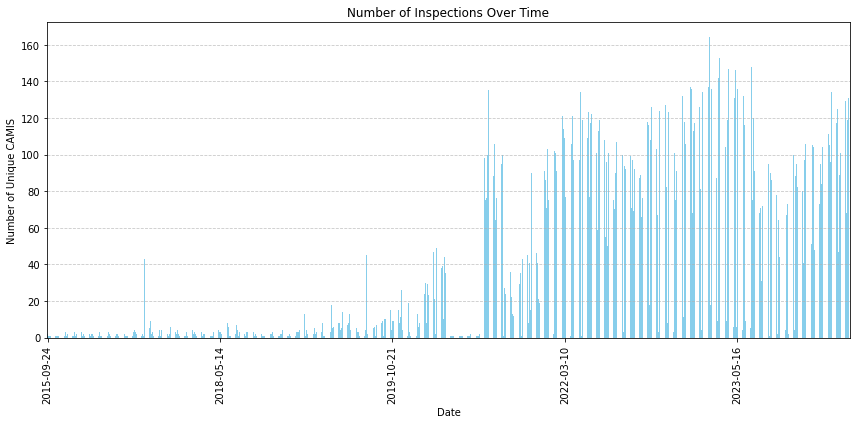

In [15]:
# Filter data for the years 2015 to 2024
filtered_data = restos_3[restos_3['inspection_date'].dt.year.between(2015, 2024)]

# Group by inspection date and count unique 'CAMIS'
unique_camis_by_date = filtered_data.groupby(filtered_data['inspection_date'].dt.date)['camis'].nunique()

# Plotting
plt.figure(figsize=(12, 6))
unique_camis_by_date.plot(kind='bar', color='skyblue')

# Set ticks to be only the years between 2015 and 2024
plt.xticks(range(len(unique_camis_by_date.index))[::365], unique_camis_by_date.index[::365])

plt.title('Number of Inspections Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Unique CAMIS')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

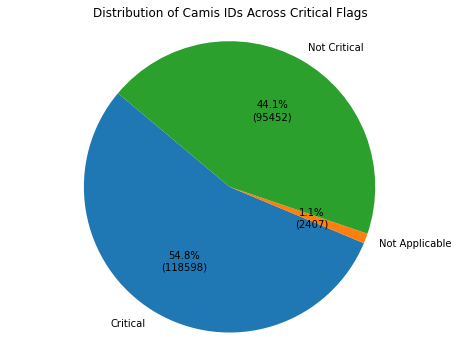

In [16]:
# Group by 'critical_flag' and count all 'camis' values
grouped_data = restos_3.groupby('critical_flag')['camis'].value_counts()

# Calculate the total count of 'camis' values for each 'critical_flag'
total_counts = grouped_data.groupby(level=0).sum()

# Plotting the pie chart
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
wedges, texts, autotexts = plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=140)

# Adding count values to each pie slice
for i, autotext in enumerate(autotexts):
    autotext.set_text("{}\n({})".format(autotext.get_text(), total_counts[i]))

plt.title('Distribution of Camis IDs Across Critical Flags')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the plot
plt.show()